## CNN for image classification

### Loading all the classes

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path=r'/Users/reeve/Desktop/DESK/MSc_AIML(++)/sem3/DL/LAB/LAB-5/DATASET'
image=[]
animal=[]
for j in os.listdir(path):
    img=cv2.imread(os.path.join(path,j))
    img=cv2.resize(img,(200,200))
    image.append(img)
    animal.append(j)
plt.figure(figsize=(12,8))
c=1
for i in range(0,len(image)):
    plt.subplot(3,3,c)
    plt.imshow(np.array(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB)))
    plt.title(animal[i])
    plt.axis('off')
    c+=1

In [ ]:
!pip install opencv-python

### Loading the Training dataset

In [ ]:
path = '/Users/reeve/Desktop/DESK/MSc_AIML(++)/sem3/DL/LAB/LAB-5/DATASET'
classes = {'cat': 0, 'dog': 1, 'elephant':2,'horse':3,'lion':4}
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j))
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

### Loading the Testing dataset

In [ ]:
path = '/Users/reeve/Desktop/DESK/MSc_AIML(++)/sem3/DL/LAB/LAB-5/DATASET'
classes = {'cat': 0, 'dog': 1, 'elephant':2,'horse':3,'lion':4}
X_test = []
Y_test = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j))
        img = cv2.resize(img, (200, 200))
        X_test.append(img)
        Y_test.append(classes[cls])

### Preprocessing sets

In [ ]:
X = np.array(X)
Y = np.array(Y)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X = X.reshape(X.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)
X=X.astype('float32')
X_test=X_test.astype('float32')
X/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
Y, Y_test = to_categorical(Y), to_categorical(Y_test)

### Splitting training dataset into training and validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.2)

### CNN model with dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
model = Sequential()
model.add(Input(shape=(200,200,3)))
# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,120,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,213,637 (19.89 MB)

 Trainable params: 5,213,637 (19.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 149s 437ms/step - accuracy: 0.3328 - loss: 1.6713 - val_accuracy: 0.7150 - val_loss: 0.7409
Epoch 2/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 150s 445ms/step - accuracy: 0.7210 - loss: 0.7259 - val_accuracy: 0.7644 - val_loss: 0.5997
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 148s 438ms/step - accuracy: 0.7868 - loss: 0.5438 - val_accuracy: 0.7707 - val_loss: 0.6314
Epoch 4/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 145s 431ms/step - accuracy: 0.8077 - loss: 0.4820 - val_accuracy: 0.7981 - val_loss: 0.5357
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 142s 421ms/step - accuracy: 0.8307 - loss: 0.4335 - val_accuracy: 0.7866 - val_loss: 0.5674
Epoch 6/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 147s 438ms/step - accuracy: 0.8583 - loss: 0.3644 - val_accuracy: 0.7959 - val_loss: 0.5343
Epoch 7/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 145s 429ms/step - accuracy: 0.8681 - loss: 0.3349 - val_accuracy: 0.8063 - val_loss: 0.5249
Epoch 8/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 145s 431ms/step - accuracy: 0.8864 -

### Plotting the accuracy and loss

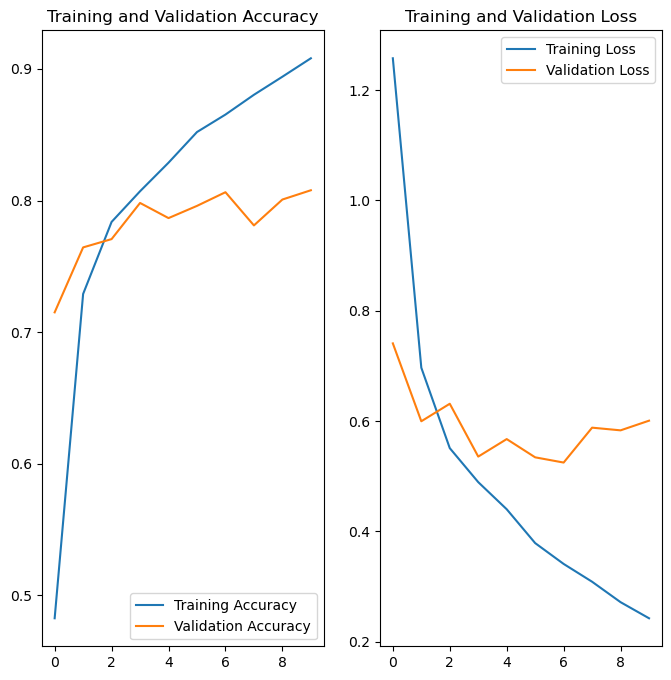

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predicting

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This image most likely belongs to elephant 


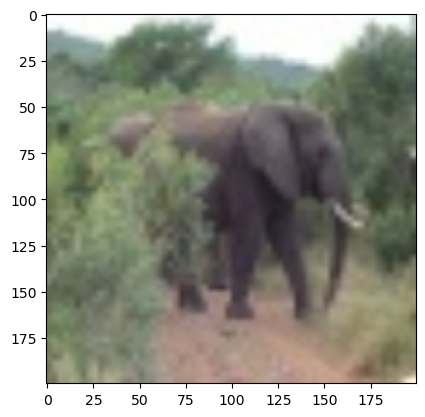

In [ ]:
import tensorflow as tf
import random
class_names=['cat','dog','elephant','horse','lion']
number=random.randint(0,X_test.shape[0])
img_array=np.expand_dims(X_test[number], axis=0)
predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)]))
plt.imshow(np.array(cv2.cvtColor(X_test[number],cv2.COLOR_BGR2RGB)))

### CNN model with data augmentation and batch normalization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import BatchNormalization, RandomFlip,RandomRotation,RandomZoom, Input
model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])
# convolutional layer
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

# flatten output of conv
model1.add(Flatten())

# hidden layer
model1.add(Dense(64, activation='relu'))
# output layer
model1.add(Dense(5, activation='softmax'))

In [ ]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 200, 200, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,120,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,214,533 (19.89 MB)

 Trainable params: 5,214,085 (19.89 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history1=model1.fit(X_train, Y_train, batch_size=32,epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 169s 497ms/step - accuracy: 0.3257 - loss: 2.6487 - val_accuracy: 0.2456 - val_loss: 8.8870
Epoch 2/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 166s 492ms/step - accuracy: 0.4277 - loss: 1.2770 - val_accuracy: 0.3863 - val_loss: 1.5606
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 161s 479ms/step - accuracy: 0.5051 - loss: 1.0843 - val_accuracy: 0.5210 - val_loss: 1.0812
Epoch 4/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 162s 482ms/step - accuracy: 0.5362 - loss: 1.0100 - val_accuracy: 0.5340 - val_loss: 0.9665
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 162s 481ms/step - accuracy: 0.5812 - loss: 0.9484 - val_accuracy: 0.5473 - val_loss: 1.2853
Epoch 6/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 162s 479ms/step - accuracy: 0.6392 - loss: 0.8757 - val_accuracy: 0.6497 - val_loss: 0.9103
Epoch 7/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 165s 488ms/step - accuracy: 0.6806 - loss: 0.7605 - val_accuracy: 0.6345 - val_loss: 0.8804
Epoch 8/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 168s 499ms/step - accuracy: 0.7151 -

### Plotting accuracy and loss

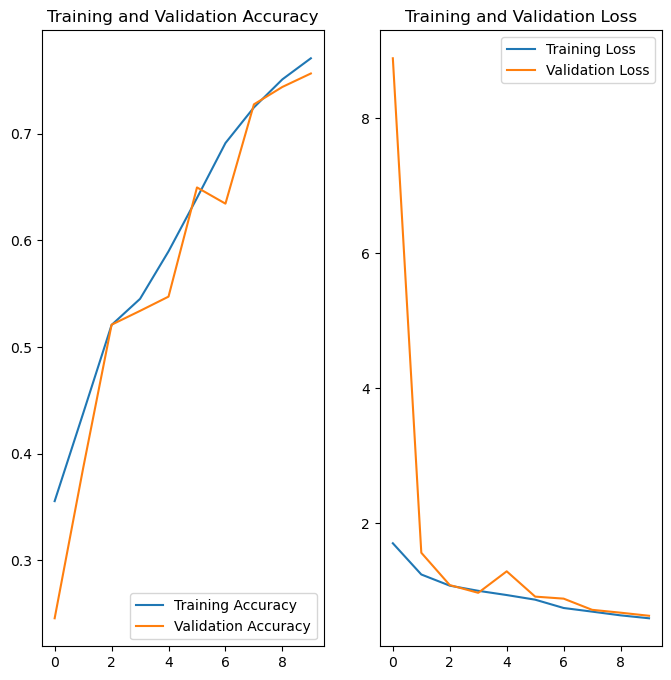

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step


array([[282,  13,   0,   2,   3],
       [  6, 287,   0,   4,   3],
       [  2,   5, 224,  28,  40],
       [  3,  20,  40, 209,  28],
       [  0,   5,  52,  13, 228]])

### Class activation map

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This image most likely belongs to cat 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


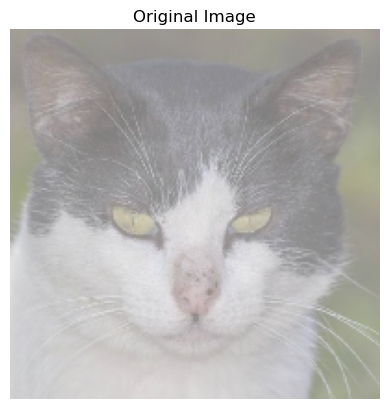

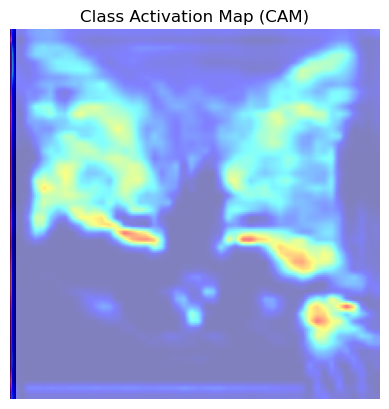

In [ ]:
from keras.models import Model
cam_model = Model(inputs=model.get_layer('conv2d').input, outputs=model.get_layer('conv2d_2').output)
number=random.randint(0,X_test.shape[0])
image=np.expand_dims(X_test[number], axis=0)
preds = model.predict(image)
score = tf.nn.softmax(preds[0])
print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)]))
last_conv_layer_output = cam_model.predict(image)
predicted_class = np.argmax(preds)
# Compute the gradient of the predicted class with respect to the output feature map
# In this case, assuming you want to compute CAM for the predicted class
gradient_model = Model(inputs=model.get_layer('conv2d').input,
                       outputs=model.get_layer('conv2d_2').output)  # Output of the last convolutional layer
with tf.GradientTape() as tape:
    output = gradient_model(image)
    loss = output[:, predicted_class]

grads = tape.gradient(loss, output)
pooled_grads = np.mean(grads, axis=(0, 1, 2))

# Multiply each channel in the feature map array by "how important this channel is" (gradient)
for i in range(last_conv_layer_output.shape[-1]):
    last_conv_layer_output[:, :, :, i] *= pooled_grads[i]

# Compute the heatmap by averaging across the channels
heatmap = np.mean(last_conv_layer_output, axis=-1)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0)  # ReLU-like activation
heatmap /= np.max(heatmap)  # Normalize to [0, 1]

# Resize heatmap to match the original image size
heatmap = cv2.resize(heatmap[0], (image.shape[2], image.shape[1]))

# Convert heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# Apply heatmap as an overlay
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Merge heatmap with the original image
superimposed_img = heatmap * 0.4 + image[0]

# # Display the original image
# plt.imshow(np.array(cv2.cvtColor(image[0],cv2.COLOR_BGR2RGB)))
# plt.axis('off')
# plt.title('Original Image')
# plt.show()

# # Display the heatmap overlayed on the original image
# plt.imshow(superimposed_img)
# plt.axis('off')
# plt.title('Class Activation Map (CAM)')
# plt.show()
# Show the original image
plt.imshow(np.array(cv2.cvtColor(image[0],cv2.COLOR_BGR2RGB)),alpha=0.5)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Show the heatmap overlayed on the original image
plt.imshow(heatmap[0], cmap='jet',alpha=1)
plt.imshow(np.array(cv2.cvtColor(heatmap,cv2.COLOR_BGR2RGB)),alpha=0.5)
plt.axis('off')
plt.title('Class Activation Map (CAM)')
plt.show()